In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

sc.settings.verbosity = 0           
sc.logging.print_header()
sc.settings.set_figure_params(figsize = [10,8],dpi =100, facecolor='white',dpi_save = 1200,frameon = False)

import matplotlib as mpl
import matplotlib.pyplot as plt
from copy import copy

vir = copy(mpl.cm.viridis)
vir.set_under("lightgray")

scanpy==1.9.6 anndata==0.8.0 umap==0.5.1 numpy==1.23.5 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.3.0 statsmodels==0.14.0 igraph==0.10.8 louvain==0.8.0 pynndescent==0.5.5


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
ct = sc.read_h5ad('P21-HET.h5ad')
ko = sc.read_h5ad('P21-KO.h5ad')

In [3]:
ct.obs['celltype'] = ct.obs['scanvi_celltype'].astype('str') + '_HET'
ko.obs['celltype'] = ko.obs['scanvi_celltype'].astype('str') + '_KO'

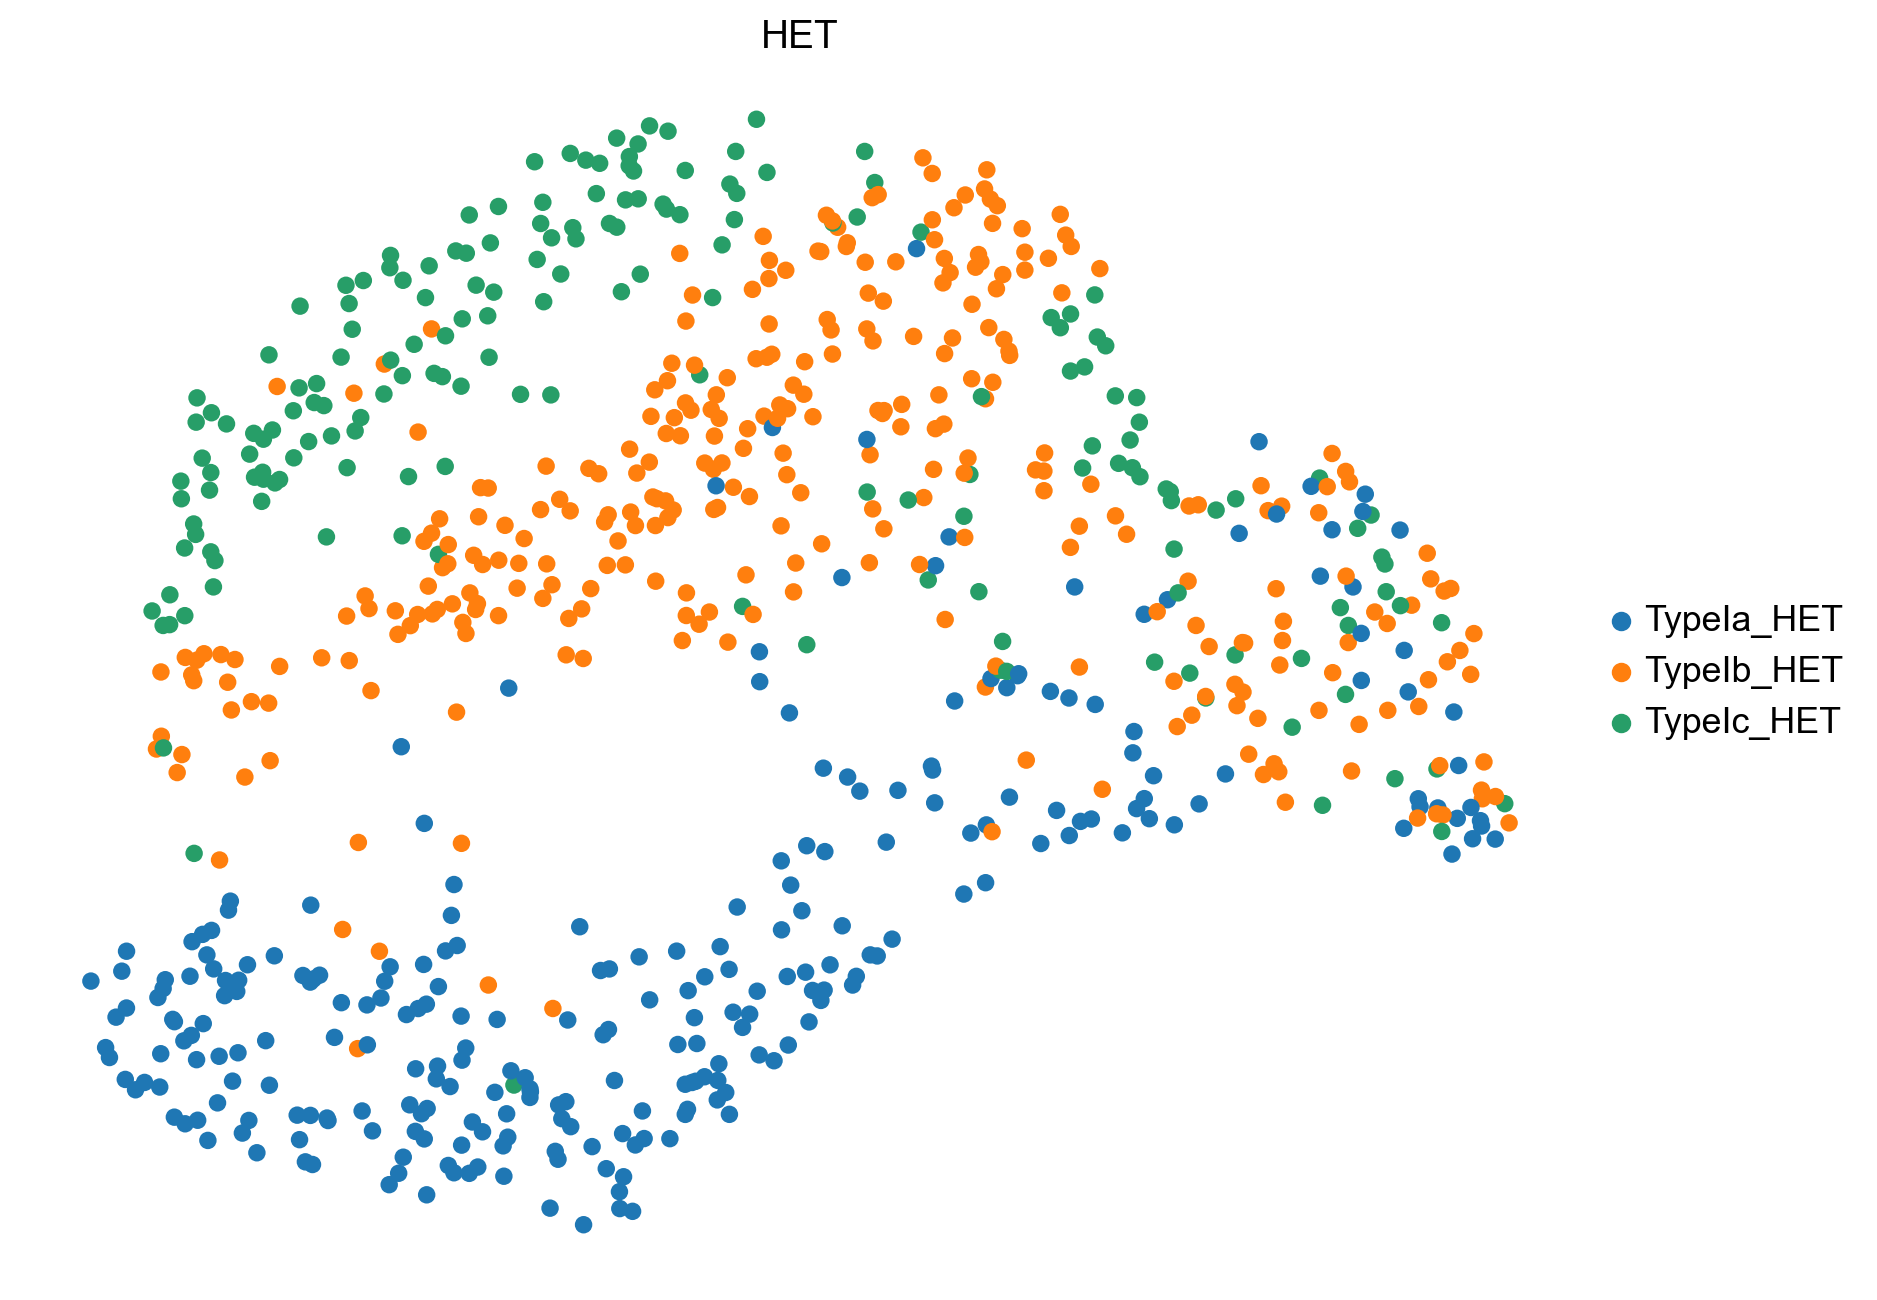

In [6]:
sc.pl.umap(ct,color = 'celltype',title = 'HET',save = 'HET_celltype.pdf')

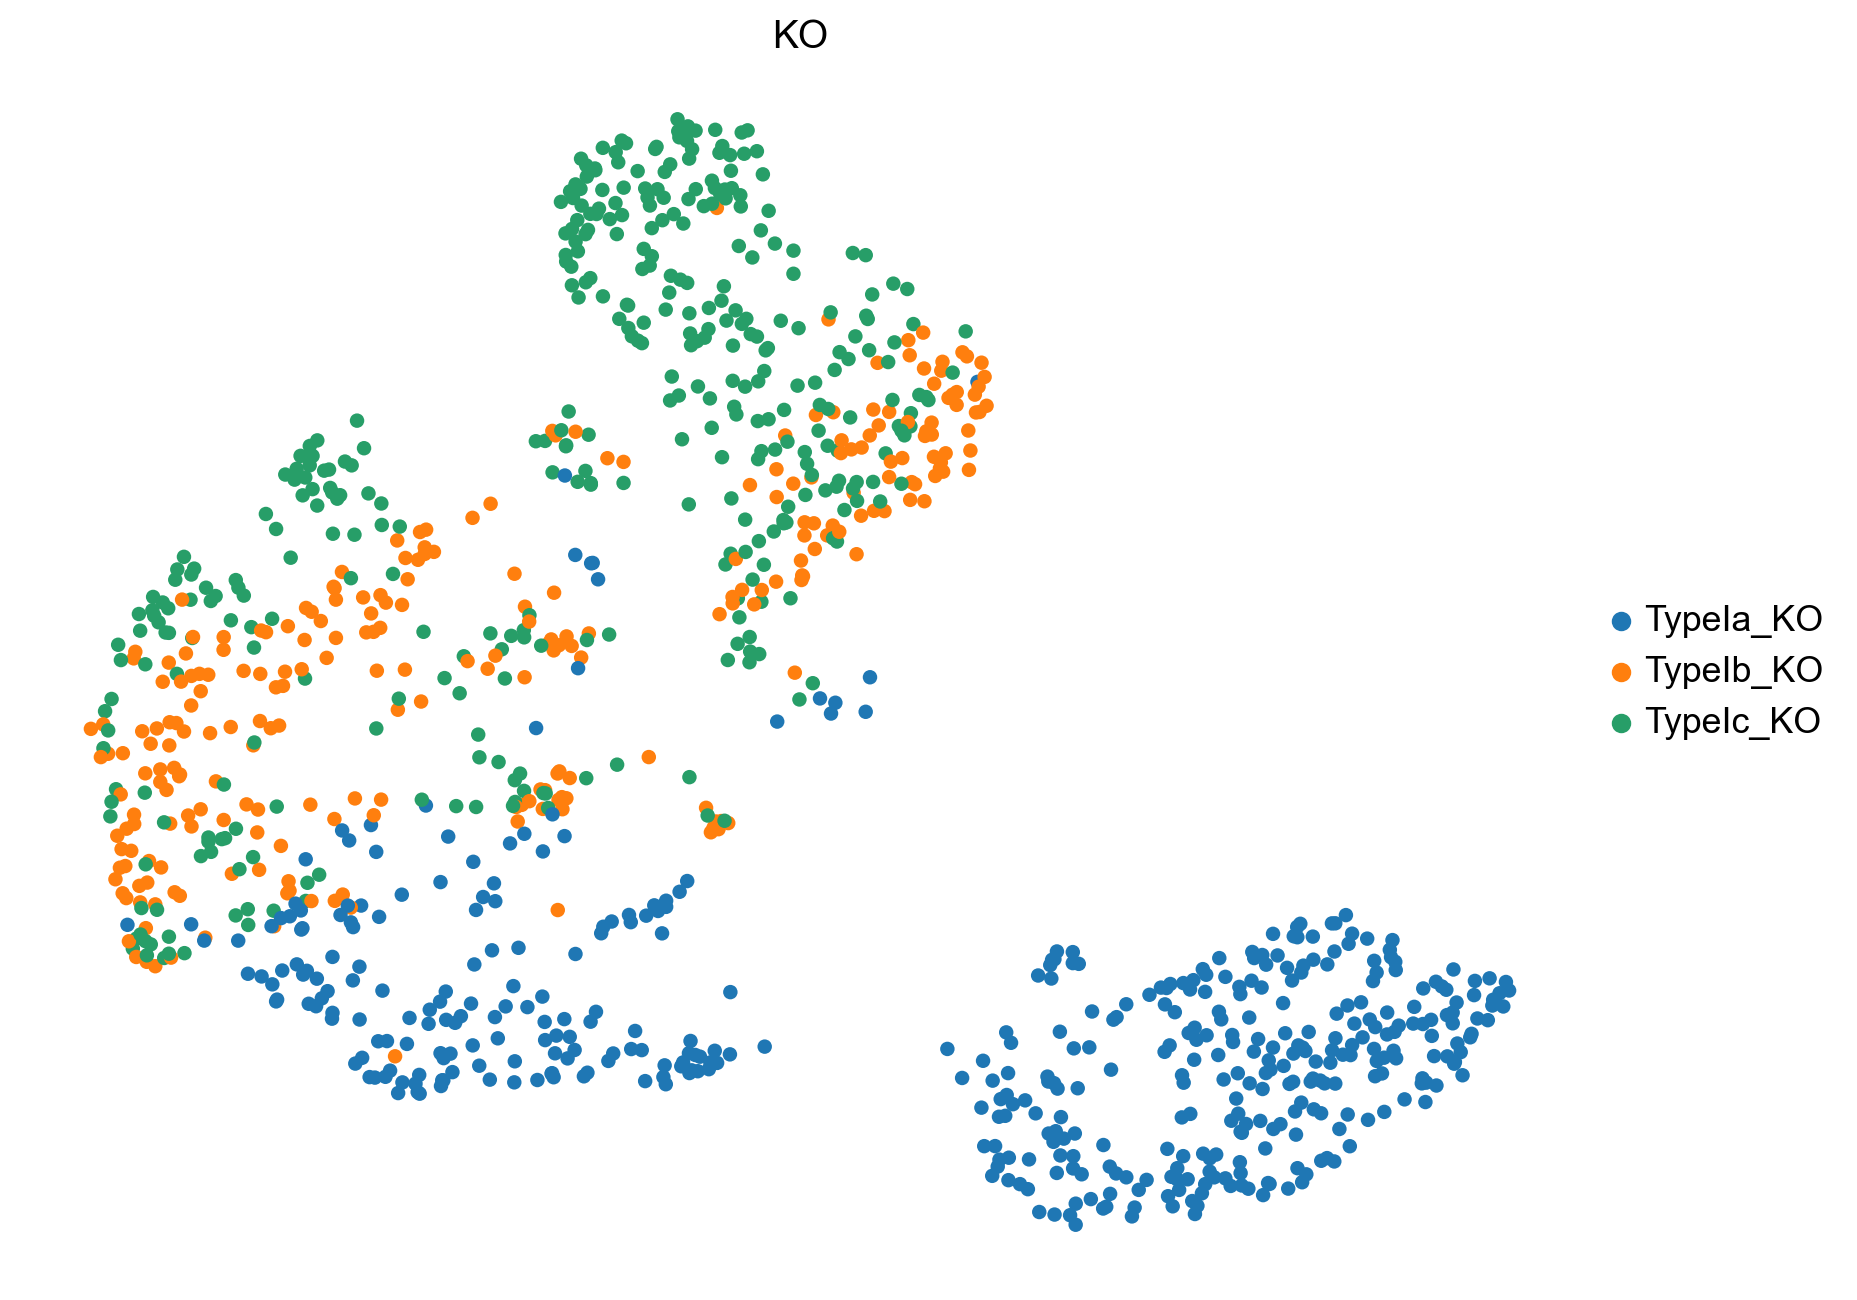

In [7]:
sc.pl.umap(ko,color = 'celltype',title = 'KO',save = 'KO_celltype.pdf')

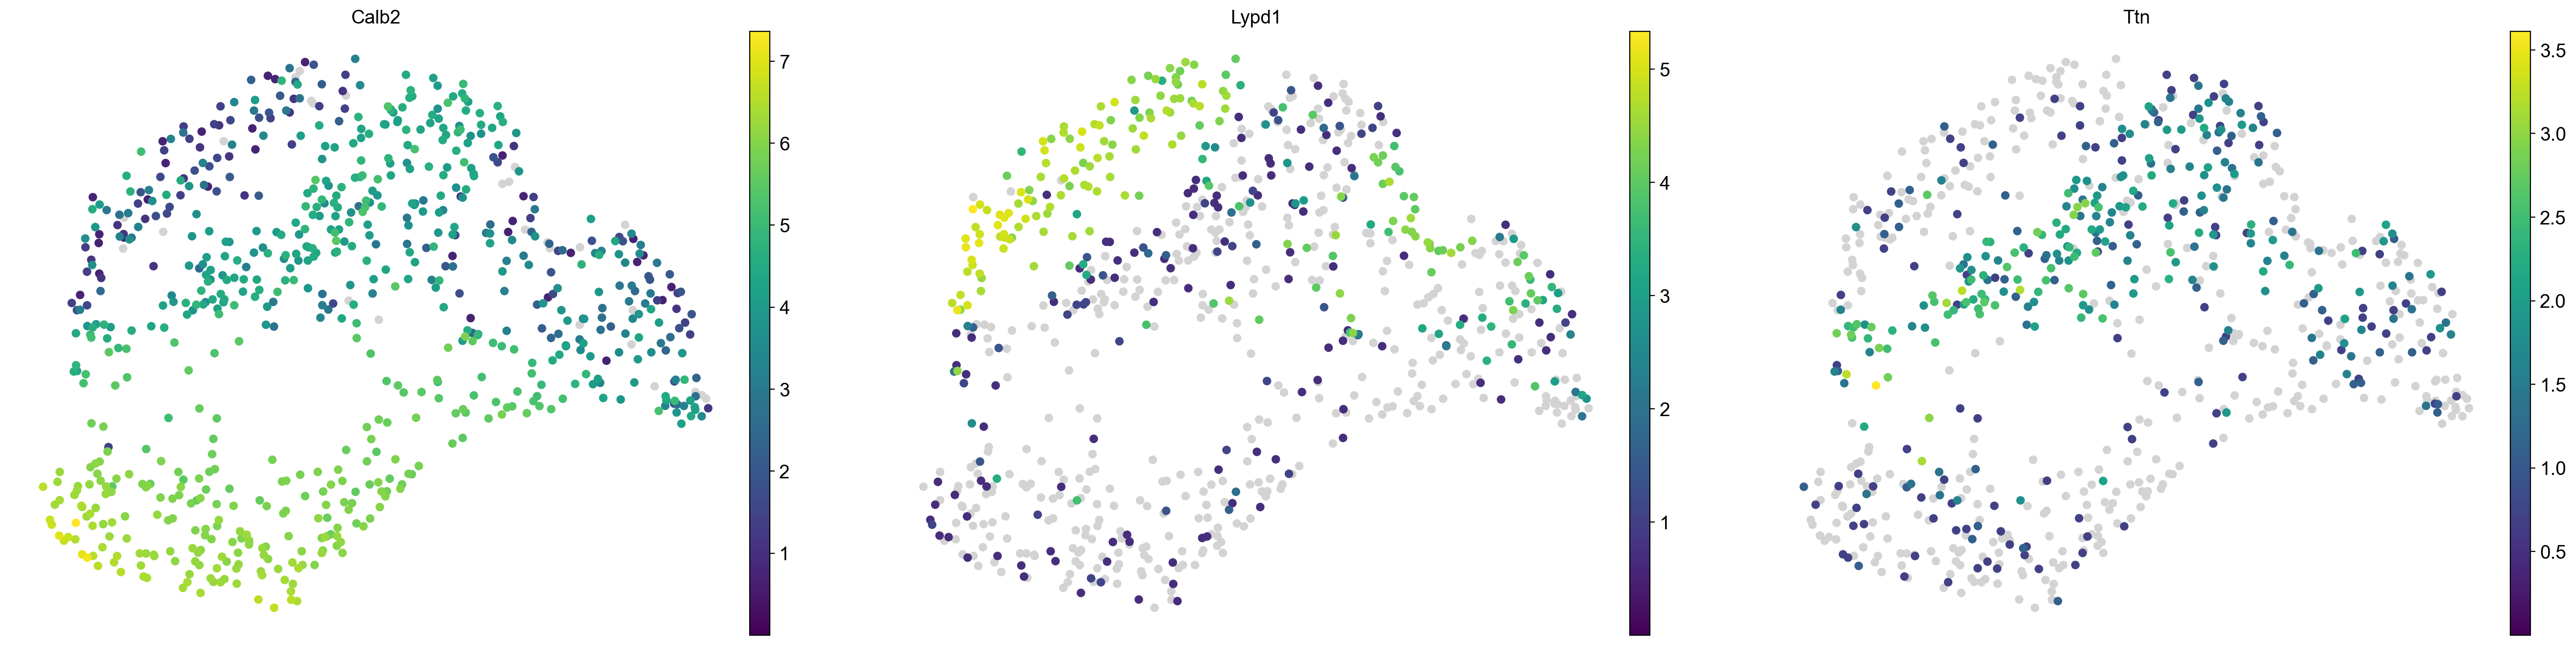

In [9]:
sc.pl.umap(ct,color = ['Calb2','Lypd1','Ttn'],layer = 'plot',color_map = vir,
           vmin = 0.0000001)

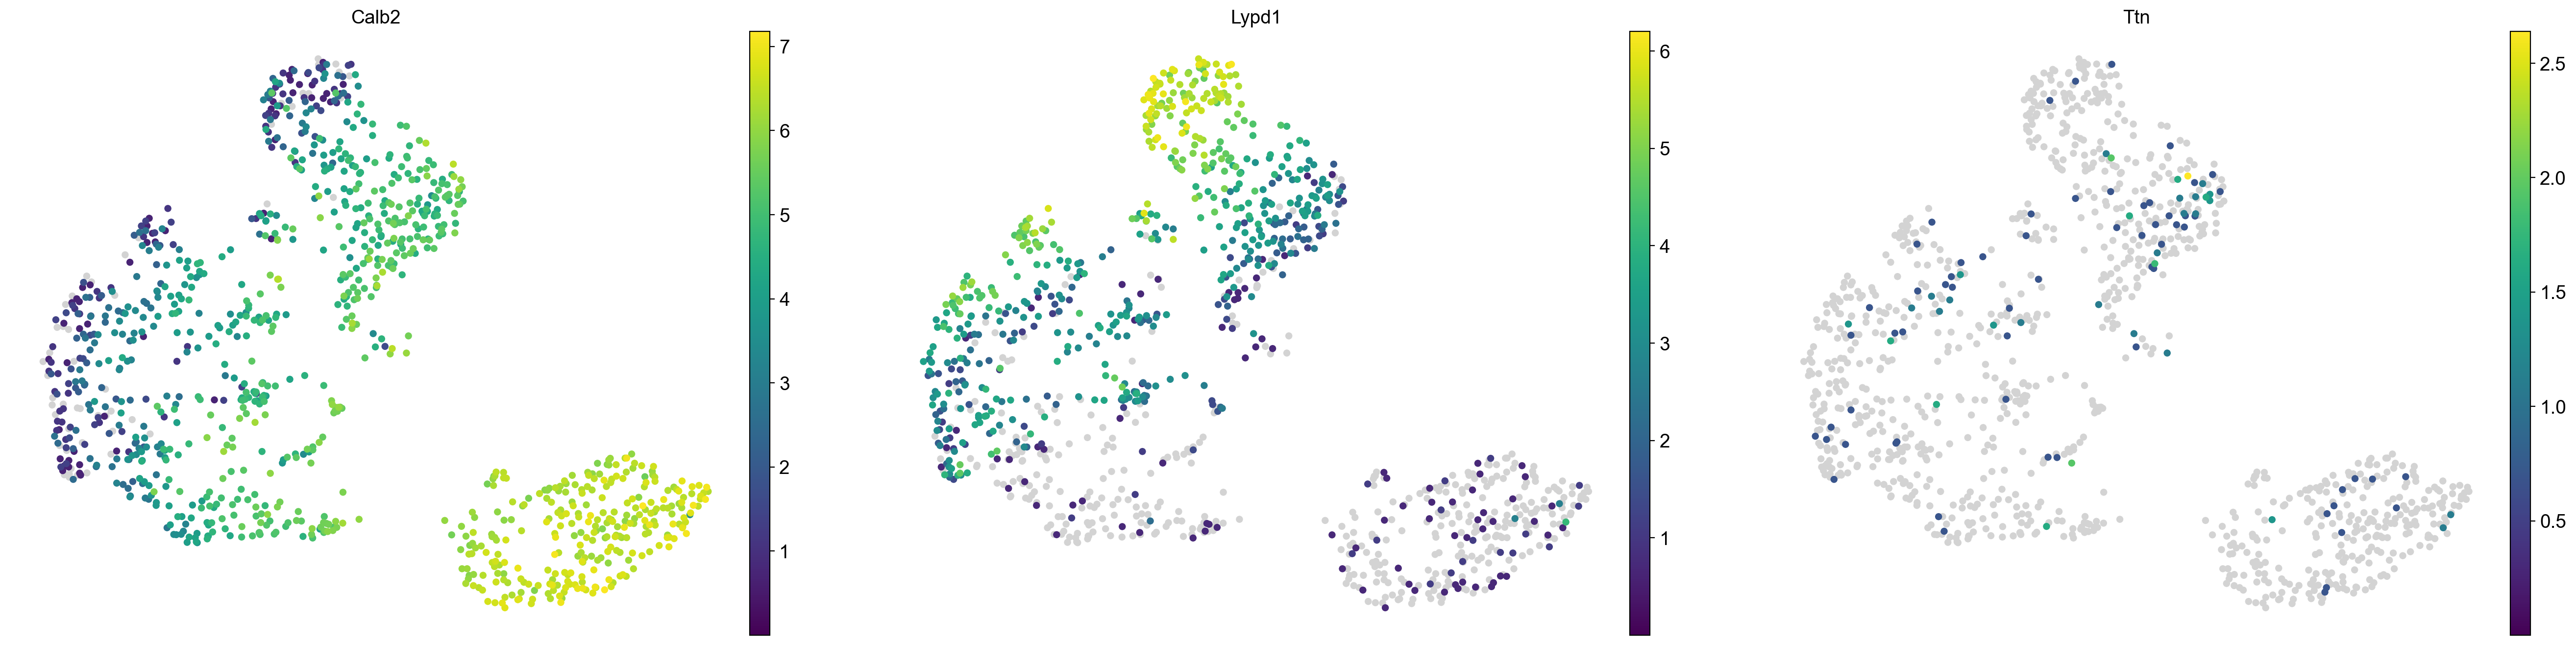

In [10]:
sc.pl.umap(ko,color = ['Calb2','Lypd1','Ttn'],layer = 'plot',color_map = vir,
           vmin = 0.0000001)

In [11]:
gene_dict = {'Axon Guidance (GO:0007411)':'ROBO2,LGI1,SEMA4D,DCC,SEMA3A,NRXN3,CNTN2,EMB,SEMA3F',
'Neuron Projection Guidance (GO:0097485)':'SEMA3D,LRTM2,SEMA4F,BOC,TNR,SLIT2,EPHA3',
'Actin-Based Cell Projection (GO:0098858)':'TENM2,GRXCR2,LRRK2,USH1C,CD302,ESPN,MYO1H,CLRN1',
'Neuron Projection Development (GO:0031175)':'BTG2,RASGRF1,STMN4,BHLHE22,POU4F1,DCLK1'}

for i in gene_dict.keys():
    gene_dict[i] = [x[0] + x[1:].lower() for x in gene_dict[i].split(',')]

In [13]:
adata = ct.concatenate(ko).copy()

{'mainplot_ax': <Axes: >,
 'gene_group_ax': <Axes: >,
 'color_legend_ax': <Axes: title={'center': 'Mean expression\nin group'}>}

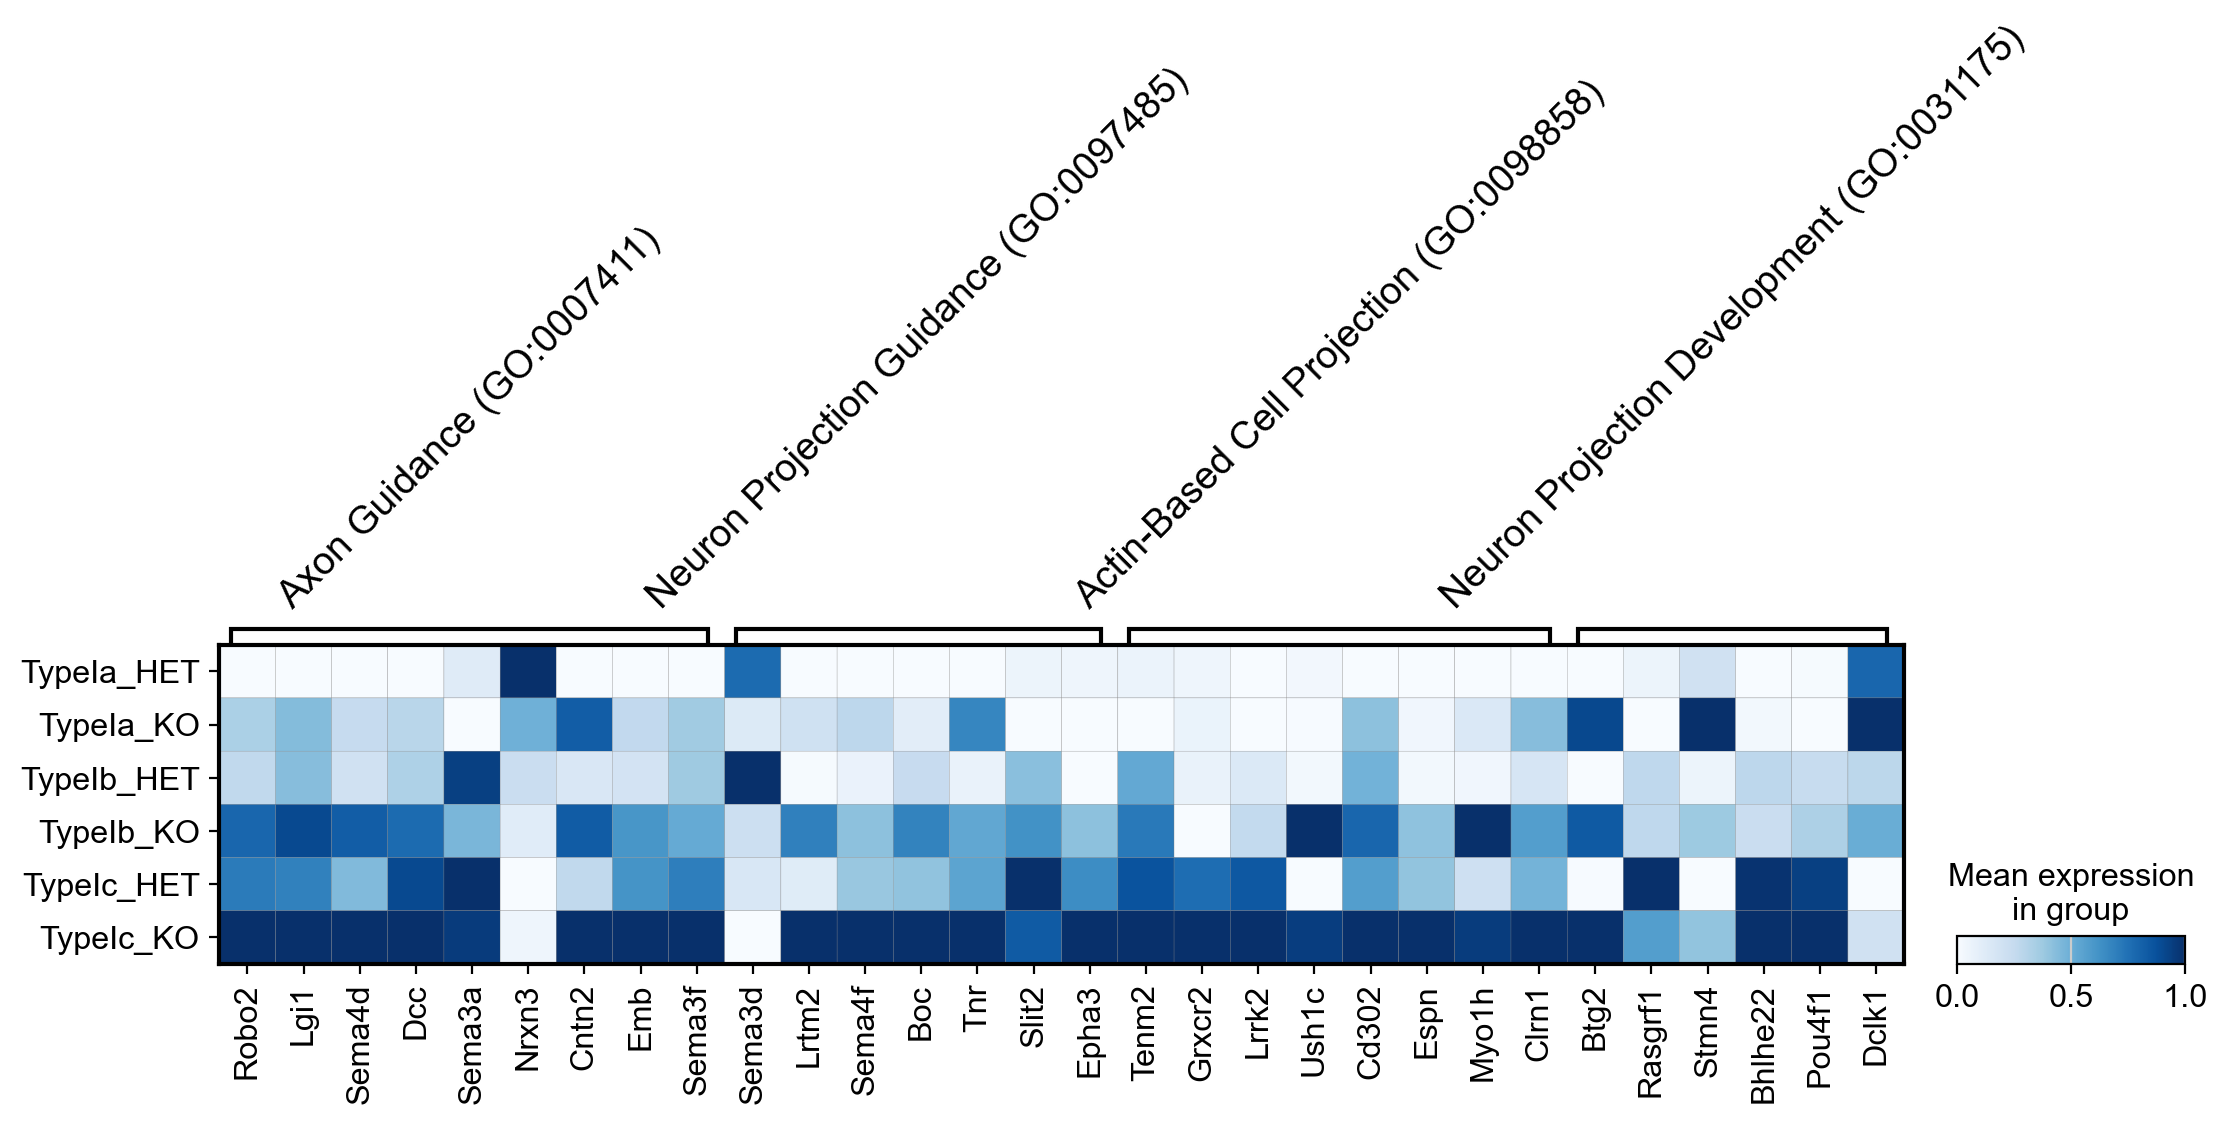

In [14]:
sc.pl.matrixplot(adata,var_names = gene_dict,groupby = 'celltype',dendrogram = False,layer = 'plot',
                 standard_scale = 'var',cmap = 'Blues',var_group_rotation = 45,show = False)
plt.savefig('P21_GO_matrixplot.pdf',dpi = 1200,bbox_inches = 'tight')

In [15]:
marker = ['Mafa',
 'Pygm',
 'Rxrg',
 'Cox8b',
 'Trim54',
 'Dlgap2',
 'B3gat1',
 '9630002D21Rik',
 'Fkbp5',
 'Col27a1',
 'Ttn',
 'Kcnd2',
 'Gm15543',
 'Kcnip3',
 'Fam184b',
 'Itga8',
 'Myo1h',
 'Shisa6',
 'Casq1',
 'Kirrel3',
 'D130009I18Rik',
 'Ndst4',
 'Fgf21',
 'Lypd1',
 'Grm8',
 'Galntl6',
 'Espn',
 'Hmcn1',
 'Sgcz',
 'Pcp4l1']

In [16]:
c = list(pd.unique(adata.obs['celltype']))

In [18]:
c.sort()

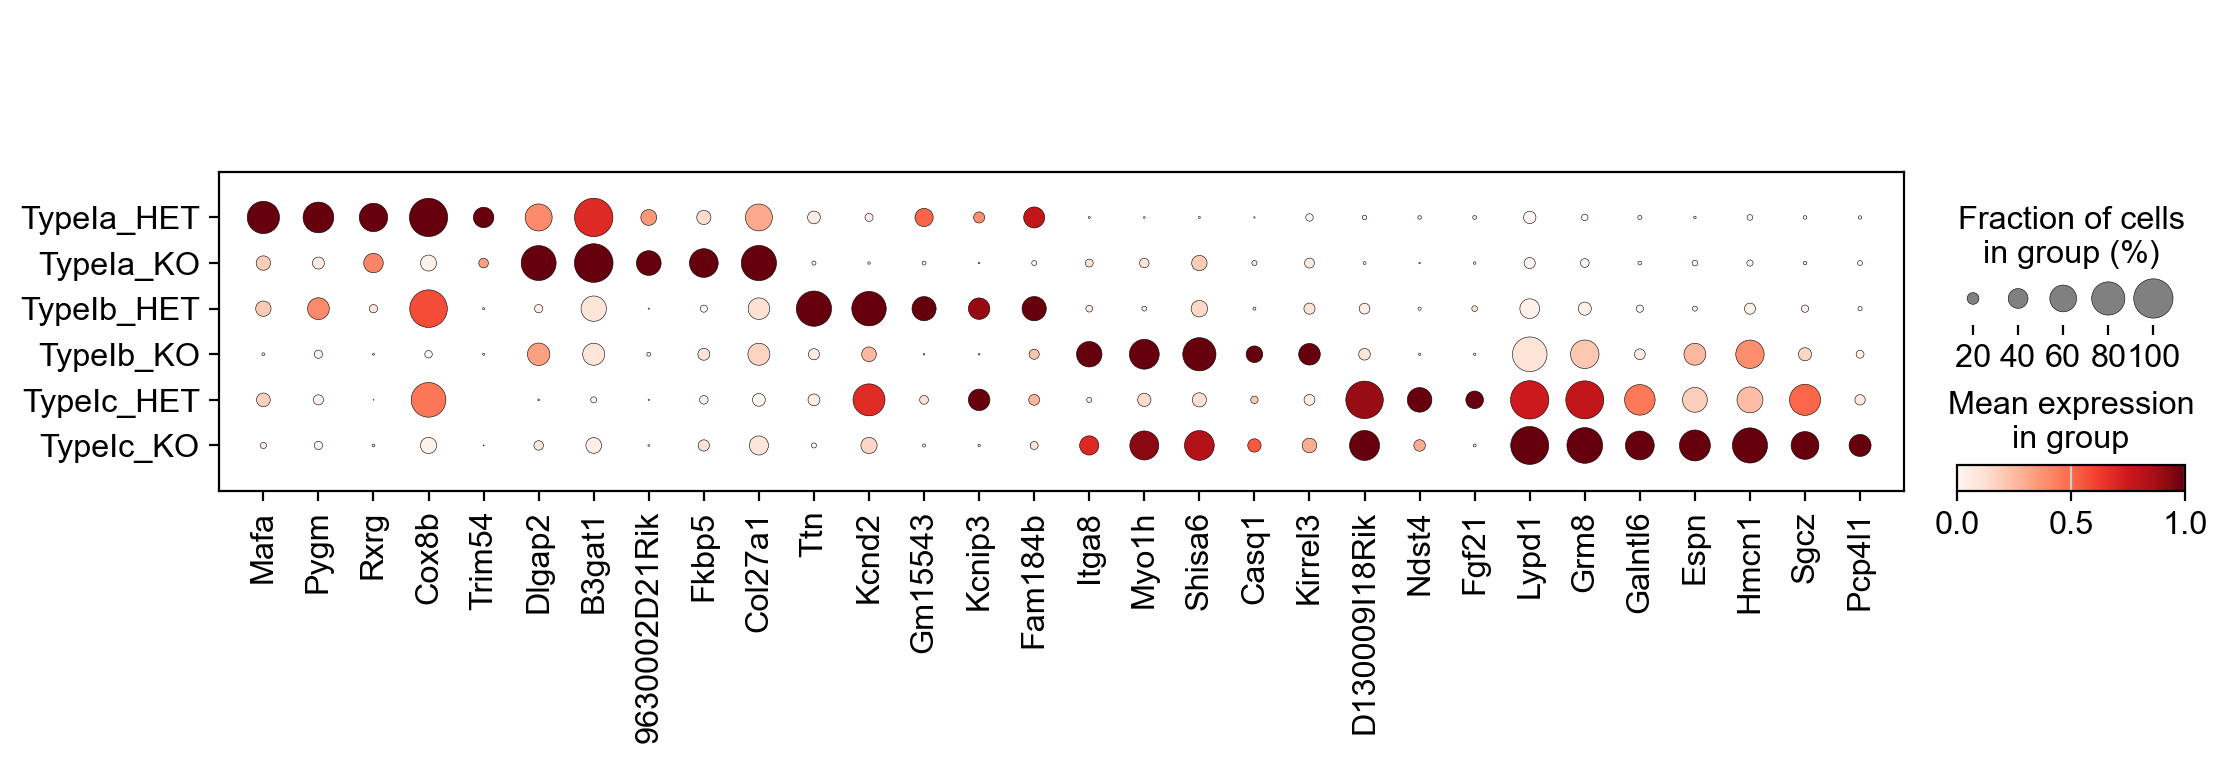

In [19]:
sc.pl.dotplot(adata, marker, 
              groupby='celltype', dendrogram= False,standard_scale = 'var',#swap_axes = True,
              categories_order = c,save = 'celltype.pdf' )

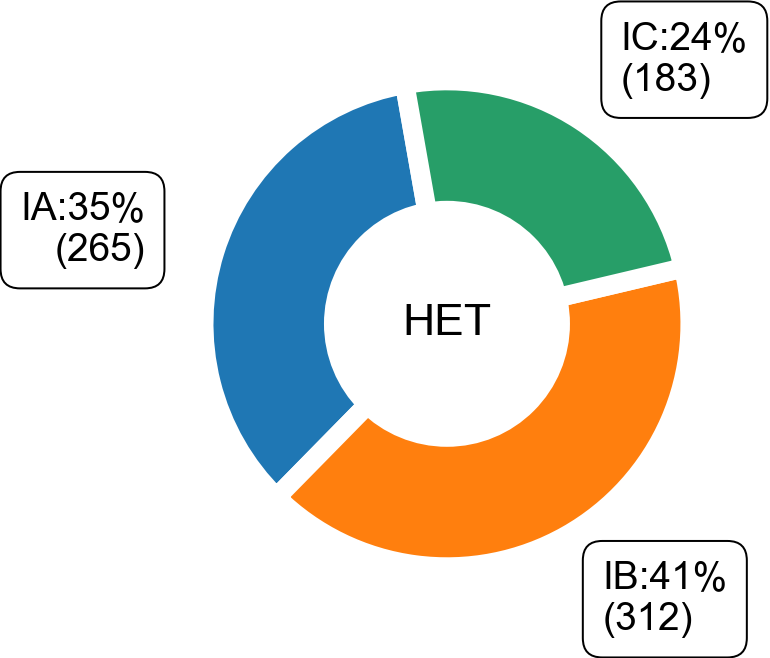

In [20]:
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw=dict(aspect="equal"))

label = ['IA:35%\n(265)',
        'IB:41%\n(312)',
        'IC:24%\n(183)']

data = [265,312,183]

wedges, texts = ax.pie(data, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' }, 
                       startangle=100,textprops={'fontsize': 12})

bbox_props = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=0.72)
kw = dict(bbox=bbox_props, zorder=0, va="center")
my_circle = plt.Circle( (0,0), 0.5, color='white')

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    #connectionstyle = f"angle,angleA=0,angleB={ang}"
    #kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.text(1.3*x, 1.3*y,label[i],horizontalalignment=horizontalalignment, **kw)

plt.text(0,0,'HET',fontsize = 16,va = 'center',ha = 'center')
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.savefig('HET_proportion.pdf',dpi = 1200)

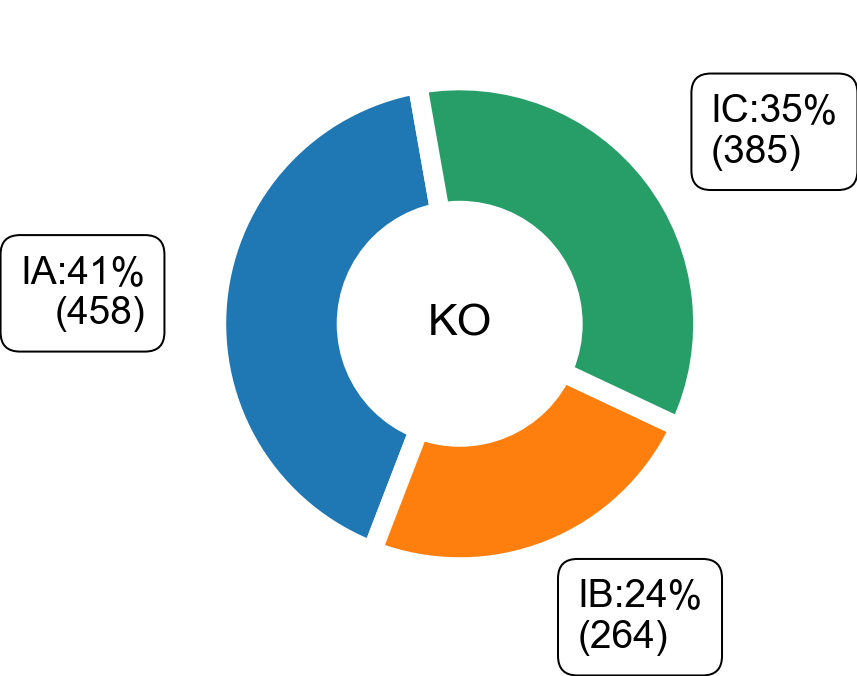

In [21]:
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw=dict(aspect="equal"))

label = ['IA:41%\n(458)',
        'IB:24%\n(264)',
        'IC:35%\n(385)']

data = [458,264,385]

wedges, texts = ax.pie(data, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' }, 
                       startangle=100,textprops={'fontsize': 12})

bbox_props = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=0.72)
kw = dict(bbox=bbox_props, zorder=0, va="center")
my_circle = plt.Circle( (0,0), 0.5, color='white')

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    #connectionstyle = f"angle,angleA=0,angleB={ang}"
    #kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.text(1.3*x, 1.3*y,label[i],horizontalalignment=horizontalalignment, **kw)

plt.text(0,0,'KO',fontsize = 16,va = 'center',ha = 'center')
p = plt.gcf()
p.gca().add_artist(my_circle)


plt.savefig('KO_proportion.pdf',dpi = 1200)